<img src="https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6)" alt="tree" width=1510px height=410px>


#  <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Cancer Diagnosis with Various Classifiers</span>

<a href="https://www.linkedin.com/in/okinoleiba" style="">Okino Kamali Leiba</a>

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data_set = "./breast-cancer_diagnostic.csv"
cancer_data = pd.read_csv(data_set, delimiter=",", encoding="utf-8", header=0, on_bad_lines="warn")

In [3]:
import sqlite3, os

file_location = os.path.abspath("population_data.db")
file_type = "db"

connection = sqlite3.connect(file_location, uri = True)

pop_data_sqlite = pd.read_sql("select * from population_data", connection)

## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;"> Exploratory Data Analysis</span>

In [4]:
cancer_data.index

RangeIndex(start=0, stop=569, step=1)

In [5]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cancer_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
cancer_data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Data Transformation and Preparation</span>

In [10]:
cancer_data.drop(["id","Unnamed: 32"], axis= 1, errors="ignore", inplace=True)

In [11]:

# for diagnosis in cancer_data.diagnosis:
#     if diagnosis == "M":
#          cancer_data.diagnosis = 1
#     else:
#         cancer_data.diagnosis = 0
# cancer_data.diagnosis=[1 if each == "M" else 0 for each in cancer_data.diagnosis]
# cancer_data.diagnosis = [diagnosis = 1 for diagnosis in cancer_data.diagnosis if diagnosis == "M" else 0 ]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cancer_data["diagnosis"] = le.fit_transform(cancer_data["diagnosis"])
cancer_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = cancer_data[features]
# X = cancer_data[0:,1:20]
# X = cancer_data.drop('diagnosis', axis=1, inplace=False, errors="ignore")
# y = cancer_data.diagnosis.values
y = cancer_data["diagnosis"]


In [13]:
from sklearn.preprocessing import MinMaxScaler
X = (X - np.min(X)) / (np.max(X) - np.min(X))
mms = MinMaxScaler(X)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: black;">Model Generation with PyCaret</span>

In [1]:
from pycaret.classification import *
cls = setup(data=cancer_data, target="diagnosis")

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\okino\anaconda3\envs\conda_env\Lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:
cm = compare_models()
# et	Extra Trees Classifier
# xgboost	Extreme Gradient Boosting

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [ ]:
crtm = create_model("et")


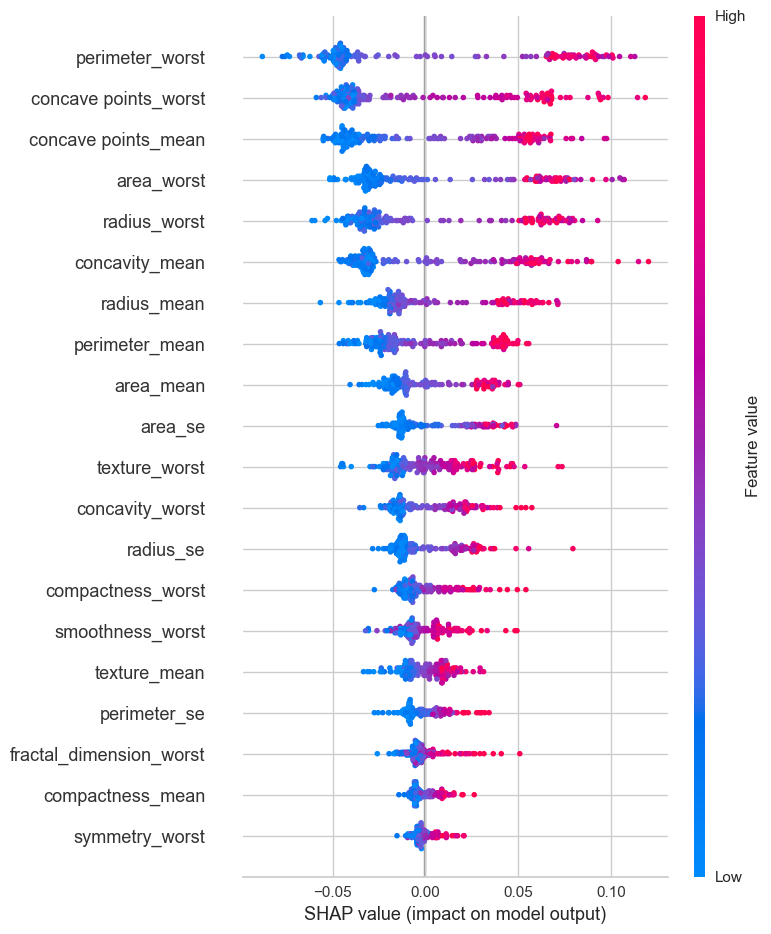

In [ ]:
interpret_model(crtm)

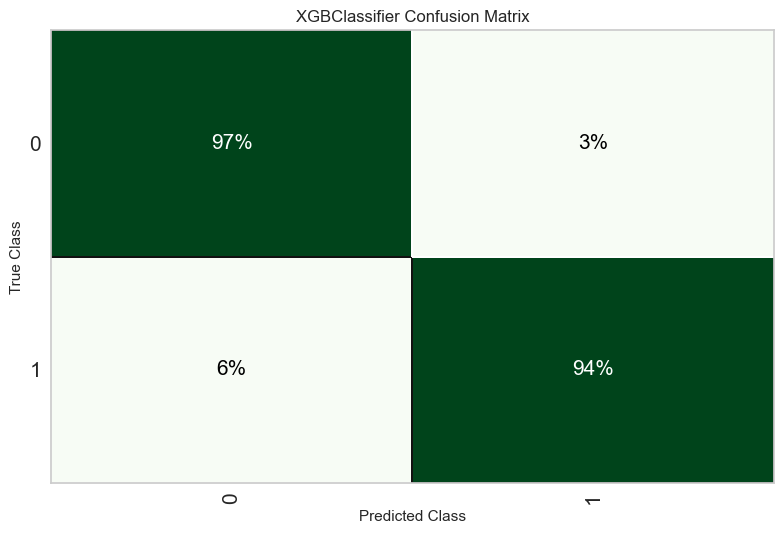

In [ ]:
plot_model(cm, plot='confusion_matrix', plot_kwargs={"percent":True})

## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Gradient Boosting Classifier</span>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
gbc.fit(X_train, y_train)
print("Gradient Boosting Classifier: ", gbc.score(X_test, y_test))

Gradient Boosting Classifier:  0.9649122807017544


In [ ]:
y_predict = gbc.predict(X_test)

cm_gbc = confusion_matrix(y_test, y_predict)
cm_gbc

array([[104,   4],
       [  2,  61]], dtype=int64)

In [ ]:
# Accuracy: (True Positive + True Negative) / Total Predictions
# Precision: True Positive / (True Positive + False Positive)
# Sensitivity: True Positive / (True Positive + False Negative)
# Specifity: True Negative / (True Negative + False Positive)
# F-Score: 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
true_negative, false_positive, false_negative, true_positive  = cm_gbc.ravel()
true_negative, false_positive, false_negative, true_positive

(104, 4, 2, 61)

In [ ]:
accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
precision = true_positive / (true_positive + false_positive)
sensitivity = true_positive / (true_positive + false_negative)
specifity = true_negative / (true_negative + false_positive)
f_score = 2 * ((precision * sensitivity)) / ((precision + sensitivity))
print("Accuracy_Extra Tree Classifier: ", accuracy)
print("Precision_Extra Tree Classifier: ", precision)
print("Sensitivity_Extra Tree Classifier: ", sensitivity)
print("Specifity_Extra Tree Classifier: ", specifity)
print("F-Score_Extra Tree Classifier: ", f_score)

Accuracy_Extra Tree Classifier:  0.9649122807017544
Precision_Extra Tree Classifier:  0.9384615384615385
Sensitivity_Extra Tree Classifier:  0.9682539682539683
Specifity_Extra Tree Classifier:  0.9629629629629629
F-Score_Extra Tree Classifier:  0.953125


## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Extra Trees Classifier</span>

In [ ]:
from sklearn.tree import ExtraTreeClassifier
et = ExtraTreeClassifier(random_state=1)
X_train_et = X_train.copy()
X_test_et = X_test.copy()
y_train_et = y_train.copy()
y_test_et = y_test.copy()
et.fit(X_train_et, y_train_et)
print("Extra Trees Classifier: ", et.score(X_test_et, y_test_et))

Extra Trees Classifier:  0.935672514619883


In [ ]:
y_predict_et = et.predict(X_test_et)

cm_et = confusion_matrix(y_test_et, y_predict_et)
cm_et

array([[101,   7],
       [  4,  59]], dtype=int64)

In [ ]:
# Accuracy: (True Positive + True Negative) / Total Predictions
# Precision: True Positive / (True Positive + False Positive)
# Sensitivity: True Positive / (True Positive + False Negative)
# Specifity: True Negative / (True Negative + False Positive)
# F-Score: 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
true_negative, false_positive, false_negative, true_positive  = cm_et.ravel()
true_negative, false_positive, false_negative, true_positive

(101, 7, 4, 59)

In [ ]:
accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
precision = true_positive / (true_positive + false_positive)
sensitivity = true_positive / (true_positive + false_negative)
specifity = true_negative / (true_negative + false_positive)
f_score = 2 * ((precision * sensitivity)) / ((precision + sensitivity))
print("Accuracy_Extra Tree Classifier: ", accuracy)
print("Precision_Extra Tree Classifier: ", precision)
print("Sensitivity_Extra Tree Classifier: ", sensitivity)
print("Specifity_Extra Tree Classifier: ", specifity)
print("F-Score_Extra Tree Classifier: ", f_score)

Accuracy_Extra Tree Classifier:  0.935672514619883
Precision_Extra Tree Classifier:  0.8939393939393939
Sensitivity_Extra Tree Classifier:  0.9365079365079365
Specifity_Extra Tree Classifier:  0.9351851851851852
F-Score_Extra Tree Classifier:  0.9147286821705426


## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Random Forest Classifier</span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()
rf.fit(X_train_rf, y_train_rf)
print("Random Forest Classifier: ", rf.score(X_test_rf, y_test_rf))

Random Forest Classifier:  0.9707602339181286


In [ ]:
y_predict_rf = rf.predict(X_test_rf)

cm_rf = confusion_matrix(y_test_rf, y_predict_rf)
cm_rf


array([[107,   1],
       [  4,  59]], dtype=int64)

In [ ]:
# Accuracy: (True Positive + True Negative) / Total Predictions
# Precision: True Positive / (True Positive + False Positive)
# Sensitivity: True Positive / (True Positive + False Negative)
# Specifity: True Negative / (True Negative + False Positive)
# F-Score: 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
true_negative, false_positive, false_negative, true_positive  = cm_rf.ravel()
true_negative, false_positive, false_negative, true_positive

(107, 1, 4, 59)

In [ ]:
accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
precision = true_positive / (true_positive + false_positive)
sensitivity = true_positive / (true_positive + false_negative)
specifity = true_negative / (true_negative + false_positive)
f_score = 2 * ((precision * sensitivity)) / ((precision + sensitivity))
print("Accuracy_Random Forest Classifier: ", accuracy)
print("Precision_Random Forest Classifier: ", precision)
print("Sensitivity_Random Forest Classifier: ", sensitivity)
print("Specifity_Random Forest Classifier: ", specifity)
print("F-Score_Random Forest Classifier: ", f_score)

Accuracy_Random Forest Classifier:  0.9707602339181286
Precision_Random Forest Classifier:  0.9833333333333333
Sensitivity_Random Forest Classifier:  0.9365079365079365
Specifity_Random Forest Classifier:  0.9907407407407407
F-Score_Random Forest Classifier:  0.9593495934959351


In [ ]:
cm_plt = pd.DataFrame([cm_rf[0], cm_rf[1]], index=pd.Index(["Non-Cancer(Negative)", "Cancer(Positive"], name="Actual Label: "), columns=pd.MultiIndex.from_product([["Confusion Matrix of Cancer Diagnosis"], ["Non_Cancer(False)", "Cancer(True)"]], names=[" ", "Predicted: "]))
cm_plt.style

## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Adaptive Boost Classifier</span>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=1)
X_train_abc = X_train.copy()
X_test_abc = X_test.copy()
y_train_abc = y_train.copy()
y_test_abc = y_test.copy()
abc.fit(X_train_abc, y_train_abc)
print("Adaptive Boost Classifier: ", abc.score(X_test_abc, y_test_abc))

Adaptive Boost Classifier:  0.9824561403508771


In [ ]:
y_predict_abc = abc.predict(X_test_abc)

cm_abc = confusion_matrix(y_test_abc, y_predict_abc)
cm_abc

array([[106,   2],
       [  1,  62]], dtype=int64)

In [ ]:
# Accuracy: (True Positive + True Negative) / Total Predictions
# Precision: True Positive / (True Positive + False Positive)
# Sensitivity: True Positive / (True Positive + False Negative)
# Specificity: True Negative / (True Negative + False Positive)
# F-Score: 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
true_negative, false_positive, false_negative, true_positive  = cm_abc.ravel()
true_negative, false_positive, false_negative, true_positive

(106, 2, 1, 62)

In [ ]:
accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
precision = true_positive / (true_positive + false_positive)
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)
f_score = 2 * ((precision * sensitivity)) / ((precision + sensitivity))
print("Accuracy_Adaptive Boost Classifier: ", accuracy)
print("Precision_Adaptive Boost Classifier: ", precision)
print("Sensitivity_Adaptive Boost Classifier: ", sensitivity)
print("Specificity_Adaptive Boost Classifier: ", specificity)
print("F-Score_Adaptive Boost Classifier: ", f_score)

Accuracy_Adaptive Boost Classifier:  0.9824561403508771
Precision_Adaptive Boost Classifier:  0.96875
Sensitivity_Adaptive Boost Classifier:  0.9841269841269841
Specificity_Adaptive Boost Classifier:  0.9814814814814815
F-Score_Adaptive Boost Classifier:  0.9763779527559054


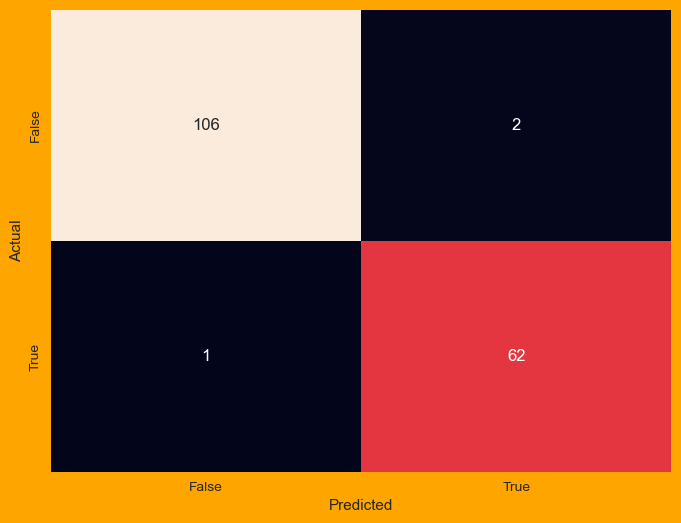

In [ ]:
plt.figure(figsize=(8,6), constrained_layout=False, dpi=100, facecolor="orange")
axe = sns.heatmap(cm_abc, annot=True,  fmt=".3g", cbar= False, xticklabels=["False", "True"], yticklabels=["False", "True"]);
axe.set_xlabel("Predicted");
axe.set_ylabel("Actual");


## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">K-Nearest Neighbors Classifier</span>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10, weights="uniform", algorithm="brute")
X_train_knc = X_train.copy()
X_test_knc = X_test.copy()
y_train_knc = y_train.copy()
y_test_knc = y_test.copy()
knc.fit(X_train_knc, y_train_knc)
print("K Neighbors Classifier: ", knc.score(X_test_knc, y_test_knc, sample_weight=None))

K Neighbors Classifier:  0.9649122807017544


In [ ]:
y_predict_knc = knc.predict(X_test_knc)

cm_knc = confusion_matrix(y_test_knc, y_predict_knc)
cm_knc

array([[106,   2],
       [  4,  59]], dtype=int64)

In [ ]:
# Accuracy: (True Positive + True Negative) / Total Predictions
# Precision: True Positive / (True Positive + False Positive)
# Sensitivity: True Positive / (True Positive + False Negative)
# Specificity: True Negative / (True Negative + False Positive)
# F-Score: 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
true_negative, false_positive, false_negative, true_positive  = cm_knc.ravel()
true_negative, false_positive, false_negative, true_positive

(106, 2, 4, 59)

In [ ]:
accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
precision = true_positive / (true_positive + false_positive)
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)
f_score = 2 * ((precision * sensitivity)) / ((precision + sensitivity))
print("Accuracy_K Neighbors Classifier: ", accuracy)
print("Precision_K Neighbor Classifier: ", precision)
print("Sensitivity_K Neighbor Classifier: ", sensitivity)
print("Specificity_K Neighbor Classifier: ", specificity)
print("F-Score_K Neighbor Classifier: ", f_score)

Accuracy_K Neighbors Classifier:  0.9649122807017544
Precision_K Neighbor Classifier:  0.9672131147540983
Sensitivity_K Neighbor Classifier:  0.9365079365079365
Specificity_K Neighbor Classifier:  0.9814814814814815
F-Score_K Neighbor Classifier:  0.9516129032258064


## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">AUC - ROC</span>

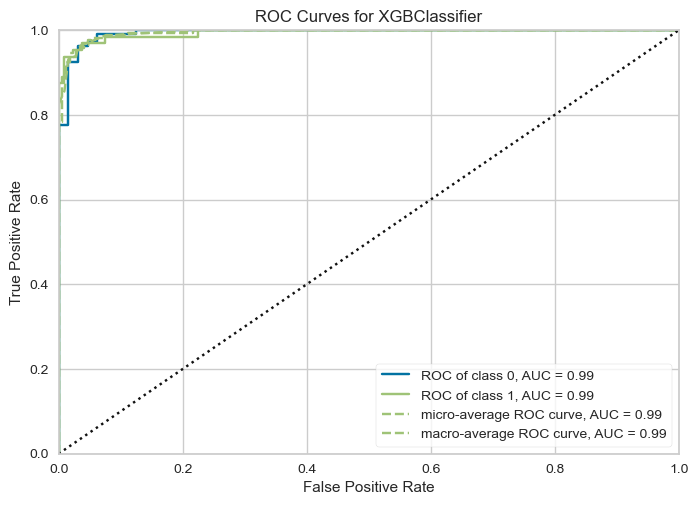

In [ ]:
plot_model(cm, plot='auc')

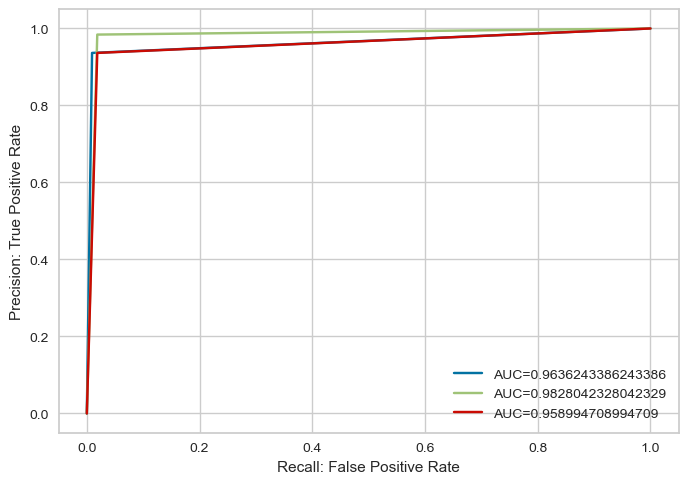

In [ ]:

y_predict_rf = rf.predict(X_test)
y_predict_abc = abc.predict(X_test)
y_predict_knc = knc.predict(X_test)
y_predict = [y_predict_rf, y_predict_abc, y_predict_knc]
for y_proba in y_predict:
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr,label="AUC="+str(auc))
    plt.legend()
    plt.xlabel("Recall: False Positive Rate")
    plt.ylabel("Precision: True Positive Rate")

## <span style="background-image: url(https://img.freepik.com/free-vector/hand-drawn-tree-life-brown-shades_23-2148703761.jpg?w=740&t=st=1683924116~exp=1683924716~hmac=61b5f87828f15616fb97b47c8068990abdee0657d540607c983bc4e586c862e6); background-size: cover; background-repeat: no-repeat; color: #4d4d4d;">Mean Squared Error</span>

In [ ]:
from sklearn.metrics import mean_squared_error
print("Gradient Boosting Classifier: ", mean_squared_error(y_test, gbc.predict(X_test)))
print("Extra Trees Classifier: ", mean_squared_error(y_test, et.predict(X_test)))
print("Random Forest Classifier: ", mean_squared_error(y_test, rf.predict(X_test)))
print("Adaptive Boost Classifier: ", mean_squared_error(y_test, abc.predict(X_test)))
print("K-Nearest Neighbors Classifier: ", mean_squared_error(y_test, knc.predict(X_test)))

Gradient Boosting Classifier:  0.03508771929824561
Extra Trees Classifier:  0.06432748538011696
Random Forest Classifier:  0.029239766081871343
Adaptive Boost Classifier:  0.017543859649122806
K-Nearest Neighbors Classifier:  0.03508771929824561
